In [4]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, simplify
from sympy.solvers import solve
from scipy.signal import sawtooth
%matplotlib inline

print "\nElectrical Circuits\n"
vo = Symbol("vo")
vr = Symbol("vr")
ir = Symbol("ir")
ic = Symbol("ic") #complete the line
il = Symbol("il") #complete the line
r = Symbol("r") #complete the line
omega = Symbol("omega")
c = Symbol("c") #complete the line
l = Symbol("l") #complete the line


eq1 = (vr + vo - 1, 
       ir - ic - il, 
       vr - ir*r,
       # what does 1j mean?
       # 1j is the imaginary number i equivalent to the square root of -1.
       vo - ic/(1j*omega*c),
       # complete the following line:
       vo - il*1j*omega*l)
# what does the following line do?
#The following line solves the system of equations for the specified variables.
sol = solve(eq1, (vo, vr, ir, ic, il))
vos = sol[vo]
# compare the output of the following line if vos = sol[vo]
print vos
#Output for vos = simplify(sol[vo]) is "l*omega/(I*c*l*omega**2*r + l*omega - I*r)".
#Outout for vos = sol[vo] is "l*omega/(I*c*l*omega**2*r + l*omega - I*r)".


Electrical Circuits

l*omega/(I*c*l*omega**2*r + l*omega - I*r)


In [5]:
numvalue = {c: 10**-6, l: 10**-3}
# what does subs()?
#subs() replaces the indicated symbols with the indicated values in vos.
# is vos.subs(c=10**-6, l=10**-3) allowed? Try it.
#No, it isn't.
vosnum = vos.subs(numvalue)
flist = [vosnum.subs({r: 100.0*3**s}) for s in range(0, 4)]
omega_axis = np.linspace(20000, 43246, 100)

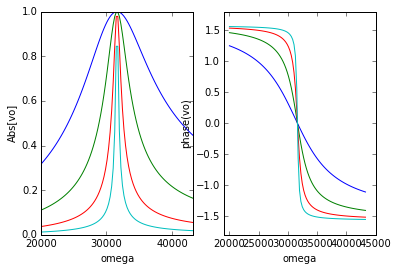

In [12]:
# what does 121 in the following line mean?
#121 refers to the number of rows, columns, and the plot number of the plot.
#1 refers to one row, 2 to two columns and 1 to plot number 1.
# what are the other possible parameters of subplot()?
#The other possible parameters of subplot() are *axisbg*, *polar*, and *projection*.
plt.subplot(121)
# describe (python type, dimensions, etc) of the input parameter/s of zip() below
#The zip() below has the absolute value of flist as its input parameter
#with its omega quantities replaced by quantities in omega_axis.
# what does zip(*a) do if a is a 2-D list or numpy array?
#It makes sure that x and y have the same first dimension.
plt.plot(omega_axis, zip(*[[abs(f.subs({omega: o})) for o in omega_axis] 
                                                    for f in flist]))
plt.xlim(20000, 43246)
plt.ylim(0, 1)
plt.xlabel('omega')
plt.ylabel('Abs[vo]')
plt.xticks([20000, 30000, 40000])

plt.subplot(122)
# Replicate Fig. 2.6, right pane following the code for Fig. 2.6, left pane
plt.plot(omega_axis, zip(*[[sympy.functions.elementary.complexes.arg(f.subs({omega: o})) for o in omega_axis]
                                               for f in flist]))
plt.ylim(-1.8, 1.8)
plt.xlim(19000, 45000)
plt.ylabel('phase(vo)')
plt.xlabel('omega')
plt.show()

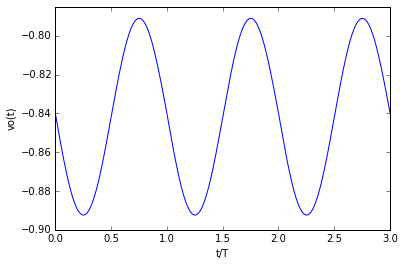

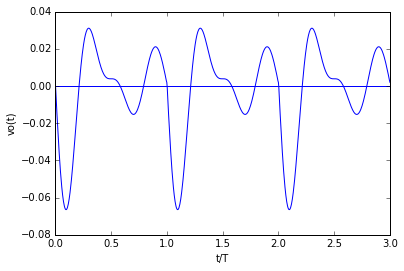

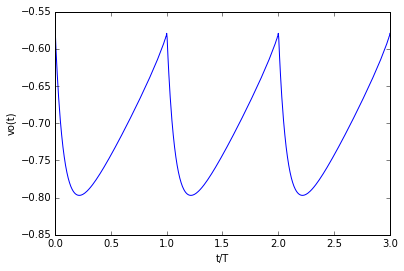

In [23]:
#def vsaw(t, T=1.0): 
    # complete this function

omegares = 1./np.sqrt(np.prod(numvalue.values())) #resonant frequency omega given by omega = 1/sqrt(LC)
alist = (1/np.sqrt(256)) * sawtooth(np.arange(256)/256.0) #input sawtoooth voltage
blist = np.sqrt(256) * np.fft.fft(alist) #fft of input sawtooth voltage

def plot3(fac, w):
    # add a docstring for this function
    """"
    Plots the output voltage versus t/T given some value 'fac' which is the ratio
    of the fundamental frequency and the resonance fequency and some value 'w' for
    the resistance of the circuit.
    """"
    omegai = fac * omegares #omegai is 2*pi/T
    # How were the limits of arange() in the following line chosen?
    #The limits of arange() were based on the properties of the selected input sawtooth voltage.
    volist = np.concatenate(([complex(vosnum.subs({omega: omegai*s, r:
                                                   w}).evalf()) 
                                 for s in np.arange(1, 129)],
                             [0.0],
                             [complex(vosnum.subs({omega: omegai*s, r:
                                                   w}).evalf()) 
                                 for s in np.arange(-127, 0)]))
    vtrans = np.fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    plt.plot(plotlist[:,0], plotlist[:,1])
    # what does the following line do?
    #Adds a horizontal line at x=0.
    plt.axhline(0)
    plt.ylabel('vo(t)')
    plt.xlabel('t/T')

plot3(1, 2700.0)
plt.ylim(-0.9,-0.785)
plt.show()
plot3(1/3., 200.0)
plt.show()
plot3(3.0, 5.0)
plt.ylim(-0.85,-0.55)
plt.show()

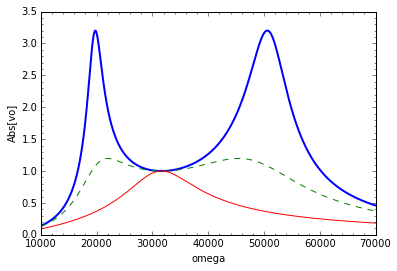

In [39]:
eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = solve(eq2, (vo, ir))
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
# why should irs be passed to sympy.abs() before squaring?
power = (r**2) *(abs(irs)**2)
flist3 = [abs(vos2.subs(numvalue).subs({r: 10.0*3**s})) 
            for s in range(0, 3)]
omega_axis = np.linspace(10000, 70000, 1000)
lines = plt.plot(omega_axis, zip(*[[abs(f.subs({omega: o})) for o in omega_axis] 
                                                    for f in flist3]))
# what does plt.setp() do?
#plt.setp() sets the object properties of the plot like line weights and line styles.
plt.setp(lines[0], lw=2)
plt.setp(lines[1], ls='--')
# add labels and ticks
plt.ylabel('Abs[vo]')
plt.xlabel('omega')
plt.minorticks_on()
plt.show()

# replicate fig. 2.10